# Motivation
illustrate gradient descendent

ref: https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/



### introduction

- In this illustration, we demonstrate the idea of using gradient descent method for linear regression model parameter estimation. i.e. given a dataset, estimate the coefficient and constant term in the linear regression model y = beta0 + beta1 * x, 
- For the reason of visulization, we only work on two parameter estimation, (i.e. beta0 and beta1). We can use Kaggle temperature data set, and take "temerature" target variable, "humidity" as the feature. 
- The parameter estimation process is as following:

#### define the cost function /error function:
$$\sum_{j=1}^{m}(y_j - \beta_0 - \sum_{i=1}^{n}\beta_ix_{ij} )^2 = \sum_{j=1}^{m}\epsilon_j^2 \qquad$$

#### visulization
represent error as z (hight of our 3D plot), with respective to the parameter (beta0 and beta1), from the 3D plot we try to find out the spot where the surface has lowest hight (indicate minimal error). Thus the associated beta0, beta1 coordinates would be the estimated parameter value.

#### gradient tells the direction to the (local) minimum
We start from an initial point, (i.e. 0,0, err_function(0,0)). Then, by taking partial derivativs w.r.t beta0, beta1, we 
can calculate the gradient. This gradient will tell us where to go to find next point, which is the "best" direction leading us to the minimum.
The equation for gradient is:...


#### one step at a time 
We define a step (i.e.0.1), and go to next point by using the fomula: next_point = current_point - gradient * current_point. And repeat the process til we find the minimum.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

# df.head(10)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     204.1
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.08e-25
Time:                        02:50:36   Log-Likelihood:                -229.24
No. Observations:                 100   AIC:                             462.5
Df Residuals:                      98   BIC:                             467.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.9382      1.163     24.019      0.000      25.630      30.246
humidity     -21.8842      1.532    -14.286      0.000     -24.924     -18.844
==============================================================================
Omnibus:                        0.993   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                1.068
Skew:                           0.161   Prob(JB):                        0.586
Kurtosis:                       2.609   Cond. No.                         9.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

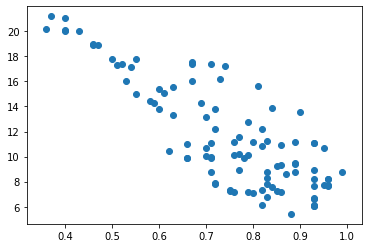

In [2]:
# build the linear regression model
# use statsmodels
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm

# Y is the target variable
Y = df['temperature'][:100]
# X is the feature set which includes
# is_male and is_smoker variables
# X = df[['humidity','windspeed']]

X = df['humidity'][:100]



plt.scatter(X, Y)

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

# plt.plot(Y)

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
const       100 non-null float64
humidity    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [0]:
# error function/ cost function
import math

def error_cal(X, Y, beta_0, beta_1):
    sample_size = len(X)
    
    Y_estimated = beta_0 + beta_1 * X
    error_sum = 0
    for y, y_estimated in zip (Y, Y_estimated):
        error_sum += math.pow(y - y_estimated, 2)
    error_sum /= sample_size   
    return error_sum


In [0]:
# get error value w.r.t. beta_0 and beta_1
# grid_list (beta_0, beta_1, error)
grid_list = []
for beta_0 in range(28-40, 28+40):
    for beta_1 in range(-21-40, -21+40):
        error_sum = error_cal(X.humidity, Y, beta_0, beta_1)
        grid_list.append([beta_0, beta_1, error_sum])

# print(grid_list)

In [0]:

beta0_list=[]
beta1_list=[]
error_list =[]
for item in grid_list:
#     print(item[0])
    beta0_list.append(item[0])
    beta1_list.append(item[1])
    error_list.append(item[2])

In [7]:
# Import dependencies
import plotly
import plotly.graph_objs as go
import plotly.express as px

# Configure Plotly to be rendered inline in the notebook.
# plotly.offline.init_notebook_mode(connected=False)


beta0_list, beta1_list, error_list
# Configure the trace.
trace = go.Scatter3d(
    x=beta0_list,  # <-- Put your data instead
    y=beta1_list,  # <-- Put your data instead
    z=error_list,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 4,
        'opacity': 0.5,
    }
)

trace1 = go.Scatter3d(
    x=[0],  # <-- Put your data instead
    y=[0],  # <-- Put your data instead
    z=[error_cal(X.humidity, Y, 0, 0)],  # <-- Put your data instead
    mode='markers',
    marker={
        'color':'red',
        'size': 20,
        
#         'opacity': 0.5,        
    },
    name='initial point'
)


# Configure the layout.
layout = go.Layout(
    scene = dict(
        xaxis_title='beta0',
        yaxis_title='beta1',
        zaxis_title='error(cost function)',
        
        
        xaxis = dict(nticks=4, range=[-12,68], ),
                     yaxis = dict(nticks=4, range=[-50,19],),
                     zaxis = dict(nticks=4, range=[0,200],),),
    
    
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace, trace1]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_xaxes(range=[1.5, 4.5])
plot_figure.update_yaxes(range=[3, 9])



# Render the plot.
plotly.offline.iplot(plot_figure)


In [0]:
# calculate the gradient (slope direction)
# by taking partial derivative

def gradient_direction(X, Y, beta0_current, beta1_current):
    beta0_temp_sum = 0
    beta1_temp_sum = 0
    for x, y in zip(X, Y):
        beta1_temp_sum += -x*(y-beta1_current*x - beta0_current)
        beta0_temp_sum += -(y-beta1_current*x - beta0_current)

    beta1_direction = beta1_temp_sum * 2 /len(X)
    beta0_direction = beta0_temp_sum * 2 /len(X)

    return beta0_direction, beta1_direction

In [0]:
# visulaize the direction
def get_trace(beta_0_current = 0, beta_1_current = 0, step = 0.05):
#     step = 0.05
#     beta_0_current = 0
#     beta_1_current = 0
    beta0_direction, beta1_direction = gradient_direction(X.humidity, Y, beta_0_current, beta_1_current)
    beta_0_next = beta_0_current - beta0_direction * step
    beta_1_next = beta_1_current - beta1_direction * step
    
    return beta_0_next, beta_1_next

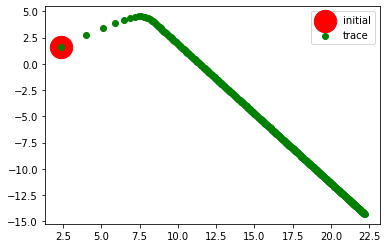

In [10]:
# print(error_cal(X.humidity, Y, beta_0_next, beta_0_next))
# print(error_cal(X.humidity, Y, 0, 0))


beta_0_current = 0
beta_1_current = 0
count = 400
x_list = []
y_list = []
z_error_list = []
while (count >0):
#     print(beta_0_current)
    x_next, y_next = get_trace(beta_0_current, beta_1_current, step = 0.1)
    x_list.append(x_next)
    y_list.append(y_next)
    z_error_list.append(error_cal(X.humidity, Y, x_next, y_next))
    
    beta_0_current = x_next
    beta_1_current = y_next
    
    count -= 1
    
# print(x_list)
# print(y_list)
# print(z_error_list)

plt.scatter(x_list[0],y_list[0], c='r', s=500, label='initial')
plt.scatter(x_list, y_list, c='g', label='trace')
plt.legend()
plt.show()

In [11]:
# Import dependencies
# import plotly
# import plotly.graph_objs as go
# import plotly.express as px
# import plotly.Line as Line

# Configure Plotly to be rendered inline in the notebook.
# plotly.offline.init_notebook_mode()



# Configure the trace.
trace = go.Scatter3d(
    x=beta0_list,  # <-- Put your data instead
    y=beta1_list,  # <-- Put your data instead
    z=error_list,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 4,
        'opacity': 0.5,
    }
)

trace1 = go.Scatter3d(
    x=[0],  # <-- Put your data instead
    y=[0],  # <-- Put your data instead
    z=[error_cal(X.humidity, Y, 0, 0)],  # <-- Put your data instead
    mode='markers',
    marker={
        'color':'red',
        'size': 10,
#         'opacity': 0.5,           
    },
    name='initial point'
)

trace2 = go.Scatter3d(
    x=x_list,  # <-- Put your data instead
    y=y_list,  # <-- Put your data instead
    z=z_error_list,  # <-- Put your data instead
    mode='markers',
    marker={
        'color':'green',
        'size': 10,
#         'opacity': 0.5,           
    }
)



# Configure the layout.
layout = go.Layout(
    scene = dict(
        xaxis_title='beta0',
        yaxis_title='beta1',
        zaxis_title='error(cost function)',
        
        xaxis = dict(nticks=4, range=[-12,68],),
                     yaxis = dict(nticks=4, range=[-50,19],),
                     zaxis = dict(nticks=4, range=[0,200],),),
    
    
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)



#create the coordinate list for the lines
# auxiliary points for gradient direction drawing
x = [0, x_list[0], -x_list[0]]
y = [0, y_list[0], -y_list[0]]
z = [error_cal(X.humidity, Y, 0, 0), z_error_list[0], error_cal(X.humidity, Y, 0, 0)+(error_cal(X.humidity, Y, 0, 0)-z_error_list[0])]

#the start and end point for each line
# pairs = [(0,1), (1,7)]
pairs = [(2,0)]
x_lines=[]
y_lines=[]
z_lines=[]
for p in pairs:
    for i in range(2):
        x_lines.append(x[p[i]])
        y_lines.append(y[p[i]])
        z_lines.append(z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

line = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
#     showscale = False,
    showlegend=False,
    
    line =dict(color='red', width=10, dash='solid')
    
    
)

# drawing a cone as 3d arrow, xyz are the head coords, uvw as direction
cone = go.Cone(
    x=[0],
    y=[0],
    z=[error_cal(X.humidity, Y, 0, 0)],
    u=[x_list[0]],
    v=[y_list[0]],
    w=[z_error_list[0]-error_cal(X.humidity, Y, 0, 0)],
    sizemode="absolute",
    sizeref=20,
    anchor="tip", 
    showscale = False,    
    )


data = [trace, trace1, trace2, line, cone]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_xaxes(range=[1.5, 4.5])
plot_figure.update_yaxes(range=[3, 9])



# Render the plot.
plotly.offline.iplot(plot_figure)